<a href="https://colab.research.google.com/github/chandbud5/Pokemon-Classifier/blob/master/Pokemon_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! git clone https://github.com/chandbud5/Pokemon-Classifier

Cloning into 'Pokemon-Classifier'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 10337 (delta 6), reused 0 (delta 0), pack-reused 10312
Receiving objects: 100% (10337/10337), 1.03 GiB | 25.96 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Checking out files: 100% (10777/10777), done.


In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1/255.0),
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.2,
                                                            rotation_range=30,
                                                            zoom_range=0.2,
                                                            horizontal_flip=True,
                                                            fill_mode="nearest")

img_data = train_gen.flow_from_directory("/content/Pokemon-Classifier/Dataset",
                                                target_size=(360,360),
                                                batch_size=50,
                                                class_mode="categorical")

Found 10593 images belonging to 149 classes.


In [ ]:
# Loading model after training for certain number of epochs
#model = create_model()
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(360, 360, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(149, activation='softmax')
])
'''
model = tf.keras.models.load_model("/content/Pokemon-Classifier/pokemon_classifier.h5")

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 358, 358, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 179, 179, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 177, 177, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 128)       7

In [ ]:
history = model.fit(img_data, epochs=20, verbose=1)
model.save("pokemon_classifier.h5")

Epoch 1/20
 51/212 [======>.......................] - ETA: 5:06 - loss: 1.1290 - accuracy: 0.6569

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


212/212 [==============================] - 417s 2s/step - loss: 1.1624 - accuracy: 0.6670
Epoch 2/20
212/212 [==============================] - 420s 2s/step - loss: 1.1301 - accuracy: 0.6754
Epoch 3/20
212/212 [==============================] - 416s 2s/step - loss: 1.1477 - accuracy: 0.6721
Epoch 4/20
212/212 [==============================] - 427s 2s/step - loss: 1.1395 - accuracy: 0.6702
Epoch 5/20
212/212 [==============================] - 419s 2s/step - loss: 1.1305 - accuracy: 0.6806
Epoch 6/20
212/212 [==============================] - 418s 2s/step - loss: 1.1204 - accuracy: 0.6791
Epoch 7/20
212/212 [==============================] - 424s 2s/step - loss: 1.1304 - accuracy: 0.6796
Epoch 8/20
212/212 [==============================] - 433s 2s/step - loss: 1.1074 - accuracy: 0.6836
Epoch 9/20
212/212 [==============================] - 432s 2s/step - loss: 1.0987 - accuracy: 0.6871
Epoch 10/20
212/212 [==============================] - 434s 2s/step - loss: 1.0908 - accuracy: 0.6872


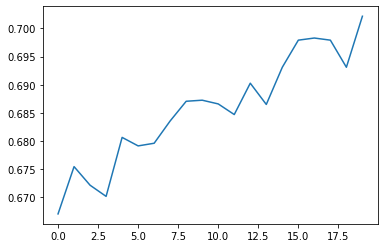

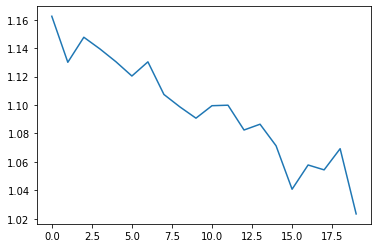

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
eph = range(len(acc))
plt.plot(eph, acc)
plt.savefig("40epochs_acc.png", dpi=300)
plt.show()
plt.plot(eph, loss)
plt.savefig("40epochs_loss.png", dpi=300)
plt.show()

In [ ]:
# phase 1 - 20 epochs - 22/06 - 43.53 accuracy
# phase 2 - 40 epochs - 22/06 - 56.83 accuracy
# phase 3 - 60 epochs - 08/07 - 62.46 accuracy
# phase 4 - 80 epochs - 19/07 - 67.23 accuracy
# phase 5 - 100 epochs - 20/07 - 70 accuracy

In [ ]:
# List out all the labels
import os
categories = os.listdir("/content/Pokemon-Classifier/Dataset")
categories.sort()
categories

['Abra',
 'Aerodactyl',
 'Alakazam',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 'Meowth',
 'Metapod',


In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(360, 360, 3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(np.argmax(classes))
  print((classes))

Saving 00000000.png to 00000000 (1).png
14
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [ ]:
print(type(classes))

<class 'numpy.ndarray'>


In [ ]:
np.max(classes)

1.0

In [ ]:
categories[np.argmax(classes)]

'Charmander'